(1460, 81)


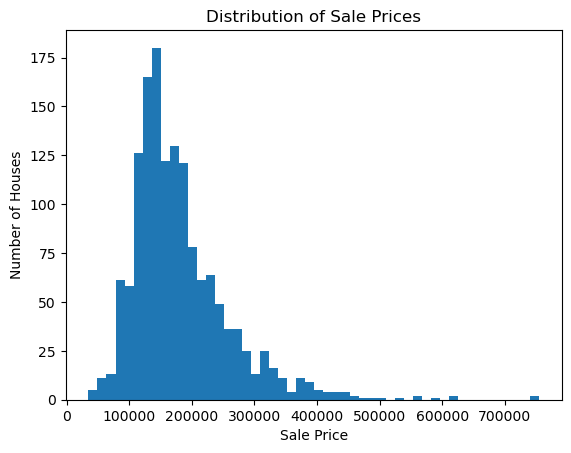

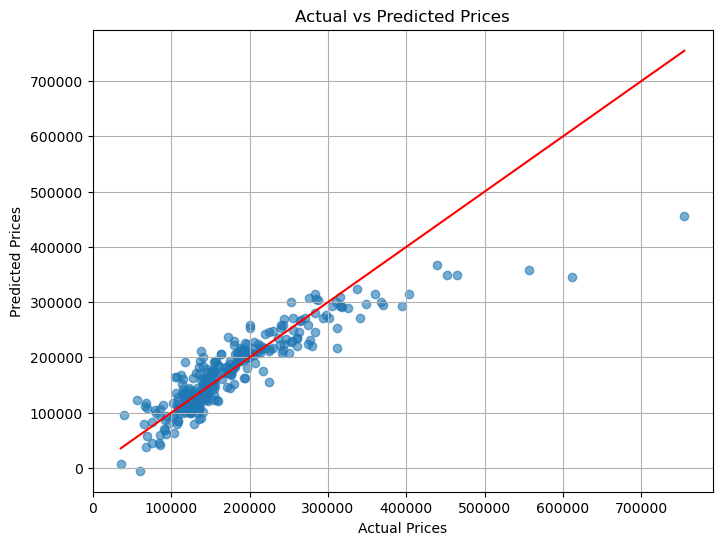

RMSE: 40036.41866406024
R² Score: 0.7910239048318475


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Charger les données
df = pd.read_csv('../data/train.csv')

# Voir la forme des données
print(df.shape)


# Aperçu des données
df.head()

df.info()
df.describe()

plt.hist(df['SalePrice'], bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.title('Distribution of Sale Prices')
plt.show()

plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('Ground living area')
plt.ylabel('Sale Price')
plt.title('Living Area vs Sale Price')
plt.show()

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

X = df[features]
y = df['SalePrice']
X = X.fillna(0)

# Séparer 80% entraînement, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
# Apprendre (entraîner) le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

joblib.dump(model, '../models/house_price_model.pkl')